    CSE572 Homework-1 Part-2

    Dhruv Vohra

    ASU ID: 1224859051

    Date: 10/11/2022

This is the Part 2 of the Homework 1 assignment. I am using the [Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult) for this assignment. The task is to use this dataset and predict whether an individual's income exceeds $50,000 per year or not based on a set of attributes/features (including age, occupation, education, and other factors). The dataset was constructed from the 1994 US Census database.

---

As part of this homework, I am going to use Random Forest and K-nearest neighbors for the binary classification task.

I will also be using GirdSearchCV and K-fold cross validation to get the most optimal set of hyperparameters for the two models.

### Import necessary packages

In [1]:
# basic packages
import pandas as pd
import numpy as np

# warning config
import warnings 
warnings.filterwarnings('ignore')

# data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# basic sklearn packages
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# sklearn model packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# sklearn metric packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

### Read data and Handle missing data

Replace all the '?' with NaN for now, later replace NaN by some appropriate value

In [2]:
raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
raw_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'class']

raw_data = raw_data.drop(['fnlwgt', 'education-num'], axis=1)

# replace all '?' with Nan values
raw_data = raw_data.replace(' ?', np.nan)

View a sample of the dataset

In [7]:
# sample dataset
raw_data.sample(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
14151,33,NaN,Some-college,Divorced,NaN,Unmarried,Amer-Indian-Eskimo,Male,0,0,30,United-States,<=50K
26544,43,Private,Bachelors,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,Germany,<=50K
20576,68,NaN,Doctorate,Married-civ-spouse,NaN,Husband,White,Male,0,0,70,United-States,<=50K
32180,19,Private,Some-college,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
26711,26,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
10918,20,Private,12th,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,35,Italy,<=50K
30552,39,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
13423,36,Local-gov,Bachelors,Never-married,Protective-serv,Not-in-family,White,Male,0,0,60,United-States,<=50K
11415,19,Private,HS-grad,Never-married,Sales,Own-child,White,Female,0,0,35,United-States,<=50K
14802,48,Private,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K


In [8]:
# the data contains 32,561 data points and 13 attributes
raw_data.shape

(32561, 13)

In [9]:
# description of the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  31978 non-null  object
 12  class           32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


It can be observed from "non-null" column above that not all attributes have 32561 counts, hence some NaN values exist.

Columns with NaN values - workclass, occupation, native-country

In [10]:
# columns with Nan values
NaN_cols = ['workclass', 'occupation', 'native-country']

# iterate over these columns and replace NaN value with the column mode
for col in NaN_cols:
  raw_data[col].fillna(raw_data[col].mode()[0], inplace=True)

In [11]:
# description of the data - after removing NaN values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  class           32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [12]:
# re-check to confirm no more NaN values
raw_data.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Finally, all NaN values have been replaced by the column mode, we can now analyse the dataset to understand the features.

### Understanding the data better - Data Visualization

#### 1. AGE

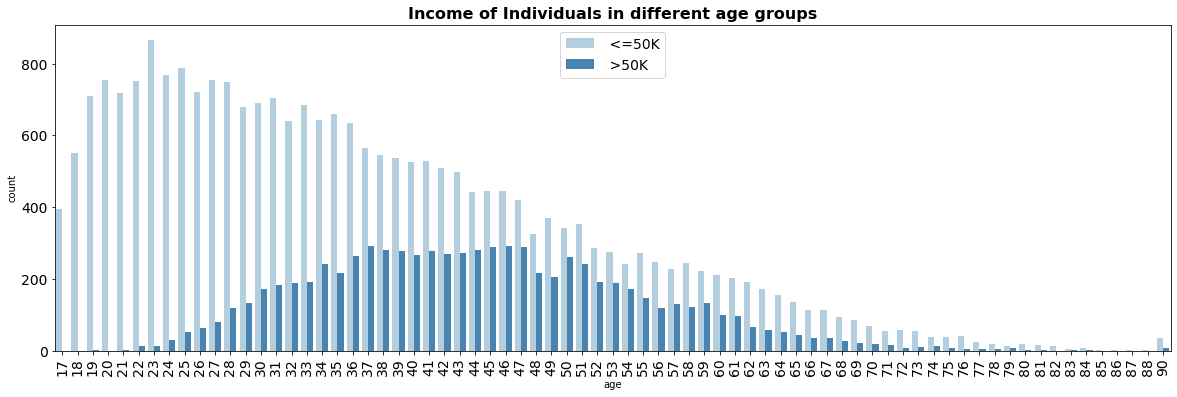

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(raw_data['age'], hue = raw_data['class'], palette='Blues')
plt.title('Income of Individuals in different age groups', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

AGE: From the plot above, it can be inferred that for all age groups, the income class "<=50K" always has greater count compared to income class ">50K". Primarily for really small or large age groups, the class label is always "<=50".

#### 2. WORKCLASS

In [14]:
# 2. workclass
raw_data['workclass'].value_counts()

# from the distribution we can see that the data contains individuals across 8 different workclasses

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

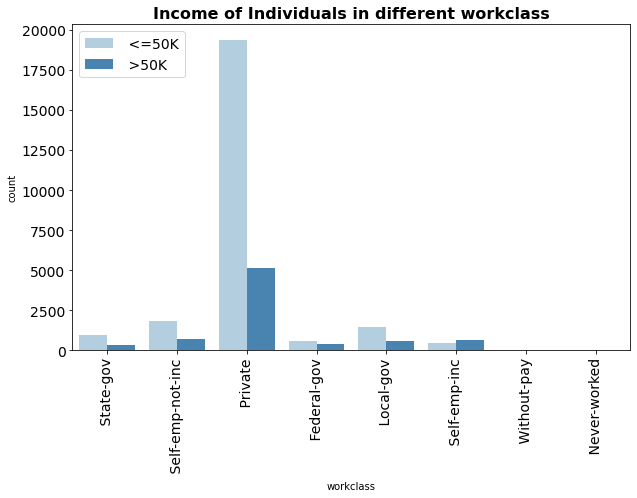

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(raw_data['workclass'], hue = raw_data['class'], palette='Blues')
plt.title('Income of Individuals in different workclass', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

WORKCLASS: From the plot above we can observe most data point belong to the type "Private". There is a decent spread for other workclasses as well.

#### 3. EDUCATION

In [16]:
# 3. workclass
raw_data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

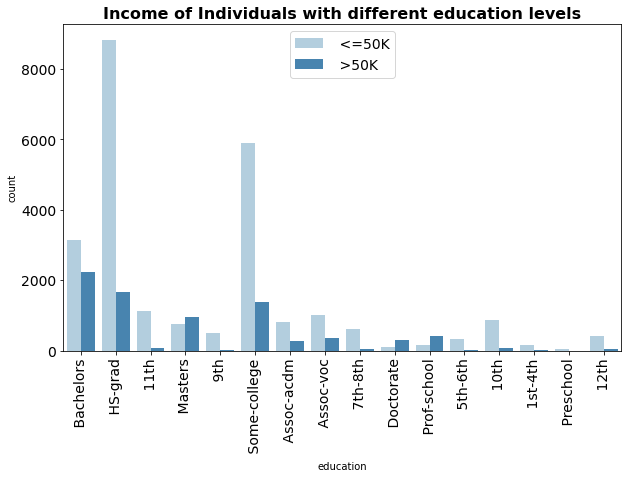

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(raw_data['education'], hue = raw_data['class'], palette='Blues')
plt.title('Income of Individuals with different education levels', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

EDUCATION: From the plot above, it can be inferred that for different education levels, there are variations that can be easily explained based on real world understanding.

Eg:

- More than 50% of the people with a master's degree tend to earn more than 50K. But the overall number of people with a master's degree is really low.

- Most people in our dataset are ones with a some-college degree or highschool grads and majority of them earn below 50K

Also from the distribution we can see that the data contains individuals with different education levels,  maybe the ones with education - 11th, 10th, 7-8th, 9th, 12th, 5-6th and 1-4th can we merged into one category called 'school' in the feature engineering step.

#### 4. MARITAL STATUS


In [18]:
raw_data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

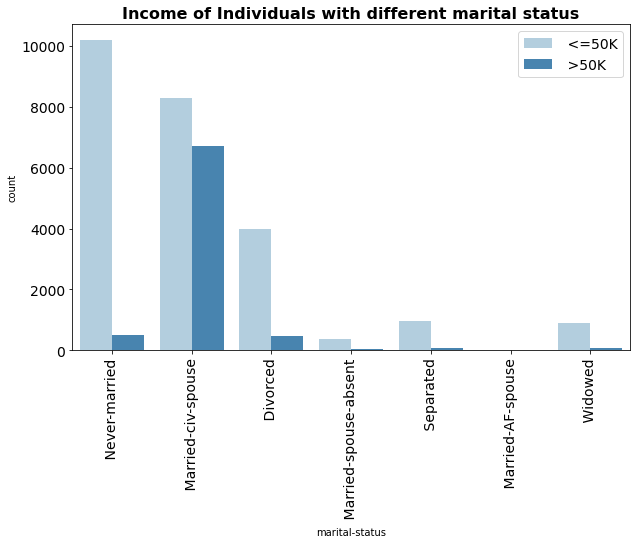

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(raw_data['marital-status'], hue = raw_data['class'], palette='Blues')
plt.title('Income of Individuals with different marital status', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

*MARITAL STATUS*: Seems like marital status is a good indicator because when its value is "Never-married" because then most probably the target class will be that the individual earns less than 50K.

#### 5. OCCUPATION

In [20]:
raw_data['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

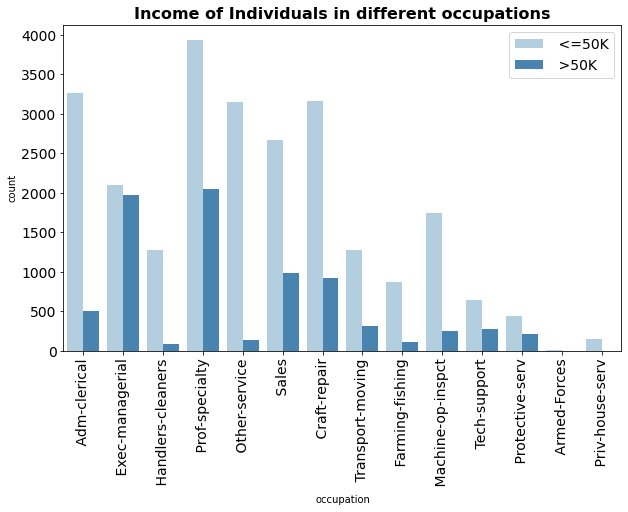

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(raw_data['occupation'], hue = raw_data['class'], palette='Blues')
plt.title('Income of Individuals in different occupations', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

#### 6. RELATIONSHIP

In [23]:
raw_data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

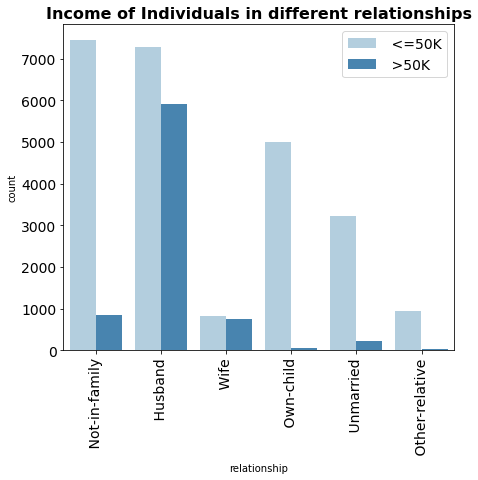

In [26]:
plt.figure(figsize=(7,6))
sns.countplot(raw_data['relationship'], hue = raw_data['class'], palette='Blues')
plt.title('Income of Individuals in different relationships', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

#### 7. RACE

In [25]:
raw_data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

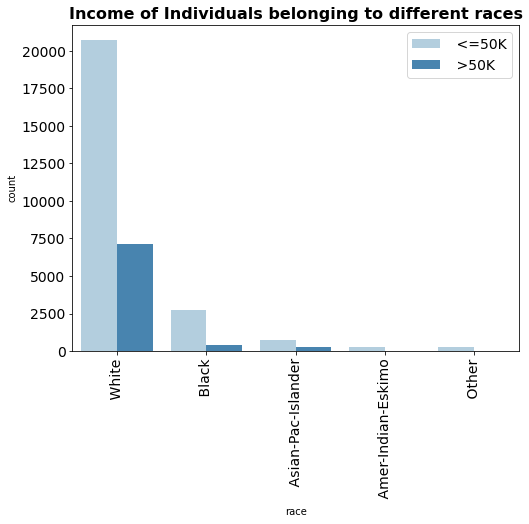

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(raw_data['race'], hue = raw_data['class'], palette='Blues')
plt.title('Income of Individuals belonging to different races', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

#### 8. SEX

In [28]:
raw_data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

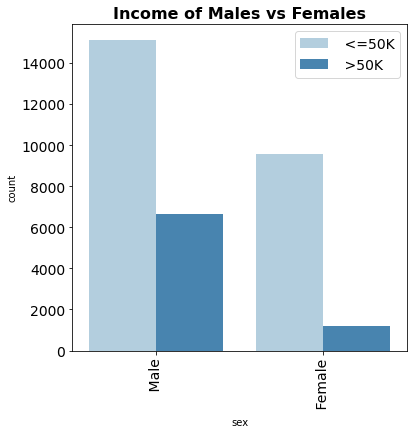

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(raw_data['sex'], hue = raw_data['class'], palette='Blues')
plt.title('Income of Males vs Females', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

#### 9. CAPITAL GAIN

As it is a continuous data, it does not make sense to display value counts


In [31]:
# helper variables for zero capital gain
zeros = 0
z_class0 = 0
z_class1 = 0

# helper variables for non zero capital gain
non_zeros = 0
nz_class0 = 0
nz_class1 = 0

for i in range(len(raw_data['class'])):
  cg = raw_data['capital-gain'][i]
  target = raw_data['class'][i]

  if(cg==0):
    zeros += 1
    if(target==" <=50K"):
      z_class0 += 1
    else:
      z_class1 += 1

  else:
    non_zeros += 1
    if(target==" <=50K"):
      nz_class0 += 1
    else:
      nz_class1 += 1

print("Total Non zeros: ",non_zeros)
print("Non zeros belonging to class <=50K", nz_class0)
print("Non zeros belonging to class >50K", nz_class1)
print("\n")
print("Total Zeros: ",zeros)
print("Zeros belonging to class <=50K", z_class0)
print("Zeros belonging to class >50K", z_class1)

Total Non zeros:  2712
Non zeros belonging to class <=50K 1035
Non zeros belonging to class >50K 1677


Total Zeros:  29849
Zeros belonging to class <=50K 23685
Zeros belonging to class >50K 6164


From the above calculations, we can see that majority of the values (91%) are simply zeros. Moreover, it is not the case that non zero values imply a particular class as we can see a 45-55 split for non-zero capital gain classes.

Overall, it doesn't seem like capital gain is a good indicator of income and should be removed in the feature engineering step.

#### 10. CAPITAL LOSS

As it is a continuous data, it does not make sense to display value counts

In [32]:
# helper variables for zero capital loss
zeros = 0
z_class0 = 0
z_class1 = 0

# helper variables for non zero capital loss
non_zeros = 0
nz_class0 = 0
nz_class1 = 0

for i in range(len(raw_data['class'])):
  cg = raw_data['capital-loss'][i]
  target = raw_data['class'][i]

  if(cg==0):
    zeros += 1
    if(target==" <=50K"):
      z_class0 += 1
    else:
      z_class1 += 1

  else:
    non_zeros += 1
    if(target==" <=50K"):
      nz_class0 += 1
    else:
      nz_class1 += 1

print("Total Non zeros: ",non_zeros)
print("Non zeros belonging to class <=50K", nz_class0)
print("Non zeros belonging to class >50K", nz_class1)
print("\n")
print("Total Zeros: ",zeros)
print("Zeros belonging to class <=50K", z_class0)
print("Zeros belonging to class >50K", z_class1)

Total Non zeros:  1519
Non zeros belonging to class <=50K 746
Non zeros belonging to class >50K 773


Total Zeros:  31042
Zeros belonging to class <=50K 23974
Zeros belonging to class >50K 7068


From the above calculations, we can see that majority of the values (95%) are simply zeros. Moreover, it is not the case that non zero values imply a particular class as we can see a 50-50 split for non-zero capital loss classes.

Overall, it doesn't seem like capital loss is a good indicator of income and should be removed in the feature engineering step.

#### 11. HOURS PER WEEK

As it is a continuous data, it does not make sense to display value counts

#### 12. NATIVE COUNTRY

In [33]:
raw_data['native-country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

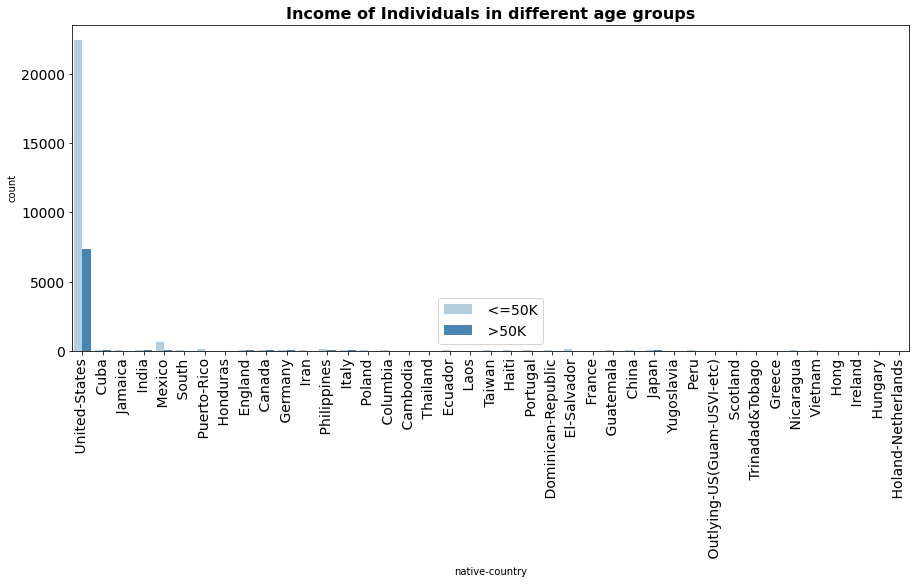

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(raw_data['native-country'], hue = raw_data['class'], palette='Blues')
plt.title('Income of Individuals in different age groups', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

Clearly, all the other countries compared the US do not add much to the model, maybe they can be merged into a single bunch and termed as international or others.

### FEATURE ENGINEERING & FEATURE SELECTION

Based on the close inspection of the data from the previous data visualization step we can make some final changes before we use the data for training a model.

1. Merge different school grades (that are values in the attribute education) into one single value - call it **School**

In [35]:
raw_data['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],' School', inplace = True)

In [36]:
raw_data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 School           4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: education, dtype: int64

2. Merge the different non-US countries into one - call it **International**

In [37]:
raw_data['native-country'].mask(raw_data['native-country'] != ' United-States', ' International', inplace=True)

In [38]:
raw_data['native-country'].value_counts()

 United-States    29753
 International     2808
Name: native-country, dtype: int64

3. Next, for the numerical attributes, remove the attributes where more than 90% of the values just belong to one class

In [39]:
temp = []
for i in ['age', 'capital-gain', 'capital-loss', 'hours-per-week']:
    if raw_data[i].value_counts(normalize=True).iloc[0] > 0.9:
        temp.append(i)
        
print(temp)

['capital-gain', 'capital-loss']


This is in line with the previous observation from the data vizualization part where 'capital-gain' and 'capital-loss' seem like they don't offer much to the model. Hence, dropping the two attributes.

In [40]:
raw_data = raw_data.drop(['capital-gain', 'capital-loss'], axis=1)

Finally our data (after feature selection) looks like:

In [71]:
raw_data.sample(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
19849,60,Private,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,65,United-States,>50K
113,28,Private,Some-college,Married-civ-spouse,Sales,Wife,White,Female,25,United-States,<=50K
22784,30,Private,HS-grad,Divorced,Adm-clerical,Unmarried,Black,Female,62,United-States,<=50K
14919,24,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,International,>50K
15951,31,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,27,United-States,<=50K
7803,55,Private,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,60,United-States,<=50K
17902,67,Private,School,Widowed,Prof-specialty,Not-in-family,White,Female,35,United-States,<=50K
14990,52,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,70,International,>50K
22703,47,Local-gov,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
28182,23,Self-emp-inc,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,50,United-States,<=50K


In [72]:
raw_data.shape

(32561, 11)

### Convert Categorical Data to Numerical Data

In [73]:
# below are the categorical attributes in our data
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

label_encoder = preprocessing.LabelEncoder()
for col in categorical:
    label_encoder.fit(raw_data[col])
    raw_data[col] = label_encoder.transform(raw_data[col])

raw_data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,6,2,4,0,1,4,1,40,1,<=50K
1,50,5,2,2,3,0,4,1,13,1,<=50K
2,38,3,4,0,5,1,4,1,40,1,<=50K
3,53,3,7,2,5,0,2,1,40,1,<=50K
4,28,3,2,2,9,5,2,0,40,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,0,2,12,5,4,0,38,1,<=50K
32557,40,3,4,2,6,0,4,1,40,1,>50K
32558,58,3,4,6,0,4,4,0,40,1,<=50K
32559,22,3,4,4,0,3,4,1,20,1,<=50K


In [74]:
raw_data['class'] = raw_data['class'].map({' <=50K': 0, ' >50K': 1})
raw_data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,6,2,4,0,1,4,1,40,1,0
1,50,5,2,2,3,0,4,1,13,1,0
2,38,3,4,0,5,1,4,1,40,1,0
3,53,3,7,2,5,0,2,1,40,1,0
4,28,3,2,2,9,5,2,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,0,2,12,5,4,0,38,1,0
32557,40,3,4,2,6,0,4,1,40,1,1
32558,58,3,4,6,0,4,4,0,40,1,0
32559,22,3,4,4,0,3,4,1,20,1,0


In [75]:
for attr in raw_data:
  print(f"Number of distinct values in {attr}: {len(raw_data[attr].unique())}")

Number of distinct values in age: 73
Number of distinct values in workclass: 8
Number of distinct values in education: 9
Number of distinct values in marital-status: 7
Number of distinct values in occupation: 14
Number of distinct values in relationship: 6
Number of distinct values in race: 5
Number of distinct values in sex: 2
Number of distinct values in hours-per-week: 94
Number of distinct values in native-country: 2
Number of distinct values in class: 2


Now that the data is in good shape to use, let's plot the correlation matrix to check how the attributes relate to the class.

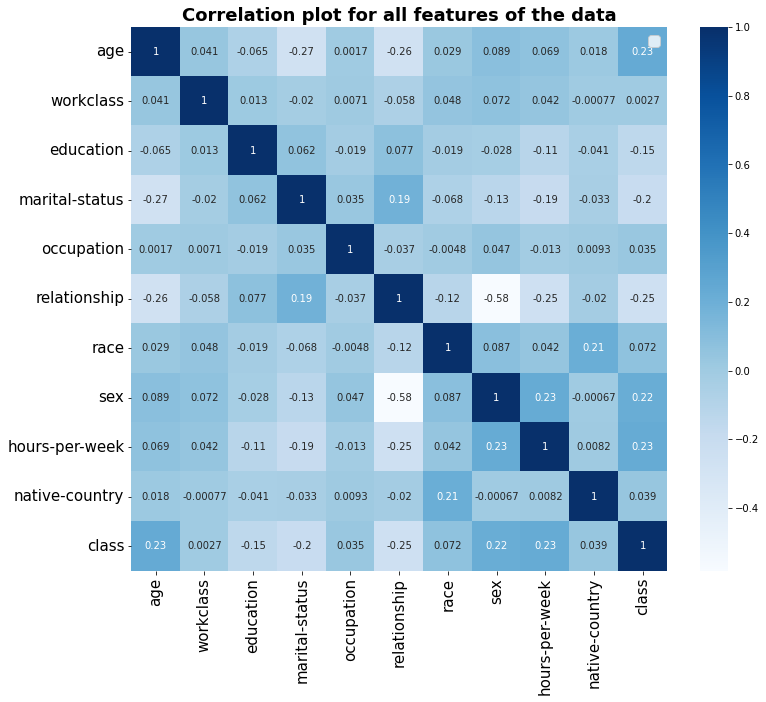

In [76]:
plt.figure(figsize = (12,10))
plt.title("Correlation plot for all features of the data", fontsize = 18, fontweight = 'bold')
sns.heatmap(raw_data.corr(), cmap = 'Blues', annot = True)
plt.yticks(fontsize=15, rotation = 0)
plt.xticks(fontsize=15, rotation = 90)
plt.legend(fontsize=15)

Observations:
1. Age, Sex and Hours-per-week are highly positively correlated to the class.
2. workclass, occupation, race and native-country are moderately positively correlated to the class
3. edication, marital-status and relationship are negatively related to the class

Next, we can use the chi-square test to find out the rankings of each feature and it's contribution to the target class.

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [89]:
X_featureSelection = raw_data.iloc[:,0:10]
y_featureSelection = raw_data.iloc[:,-1]

In [90]:
# k = 10 as we have 10 input features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_featureSelection, y_featureSelection)

In [91]:
scores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_featureSelection.columns)

In [92]:
featureScores = pd.concat([dfcolumns, scores], axis = 1)
featureScores.columns = ['Feature', 'Score']

In [93]:
featureScores

,Feature,Score
0,age,8600.611822
1,workclass,0.093544
2,education,840.789531
3,marital-status,1123.469818
4,occupation,100.356439
5,relationship,3659.143125
6,race,33.031305
7,sex,502.439419
8,hours-per-week,6476.408996
9,native-country,4.258293


In [94]:
print(featureScores.nlargest(10, 'Score'))

          Feature        Score
0             age  8600.611822
8  hours-per-week  6476.408996
5    relationship  3659.143125
3  marital-status  1123.469818
2       education   840.789531
7             sex   502.439419
4      occupation   100.356439
6            race    33.031305
9  native-country     4.258293
1       workclass     0.093544


Based on the above rankings, we can choose to ignore the lesser important features later on when trying different combinations of input.

With this, the data preprocessing, data cleaning, feature engineering, feature selection and categorical feature encoding is complete. We can now use the data to develop a Machine Learning model.

### MODEL 1 - RANDOM FOREST

Random forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

In [95]:
# create a deep copy of the preprocessed data
seed = 0
rf_data = raw_data.copy(deep = True)

In [96]:
# create train and test set
rf_X = rf_data.drop(['class'], axis=1)
rf_y = rf_data['class']

# Scale the input values
scaler = StandardScaler()

rf_X = pd.DataFrame(scaler.fit_transform(rf_X), columns = rf_X.columns)
rf_X

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,0.030671,2.624298,-1.146982,0.921634,-1.545256,-0.277805,0.393668,0.703071,-0.035429,0.307208
1,0.837109,1.721100,-1.146982,-0.406212,-0.790092,-0.900181,0.393668,0.703071,-2.222153,0.307208
2,-0.042642,-0.085296,-0.320568,-1.734058,-0.286649,-0.277805,0.393668,0.703071,-0.035429,0.307208
3,1.057047,-0.085296,0.919052,-0.406212,-0.286649,-0.900181,-1.962621,0.703071,-0.035429,0.307208
4,-0.775768,-0.085296,-1.146982,-0.406212,0.720237,2.211698,-1.962621,-1.422331,-0.035429,-3.255119
...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,-0.085296,-1.973395,-0.406212,1.475401,2.211698,0.393668,-1.422331,-0.197409,0.307208
32557,0.103983,-0.085296,-0.320568,-0.406212,-0.034928,-0.900181,0.393668,0.703071,-0.035429,0.307208
32558,1.423610,-0.085296,-0.320568,2.249480,-1.545256,1.589322,0.393668,-1.422331,-0.035429,0.307208
32559,-1.215643,-0.085296,-0.320568,0.921634,-1.545256,0.966947,0.393668,0.703071,-1.655225,0.307208


In [97]:
# spliting train and test into 60-40 ratio
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(rf_X, rf_y, test_size = 0.4, random_state = seed)

In [98]:
# create a new random forest classifier without any hyperparams
rfc = RandomForestClassifier()

# create a parameter grid to check the best model hyperparameters

# n_estimators -> number of trees in the forest
# criterion -> function to measure the quality of split
# max_features -> number of features to consider for the best split
# bootstrap -> whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
# randomstate -> controls both the randomness
param_grid_rfc = { 'n_estimators': [10, 25, 50, 75, 100, 150], 
              'criterion': ['gini', 'entropy'],
              'max_features': [None, "sqrt", "log2"],
              'bootstrap': [True, False],
              'random_state' : [seed],
            }

# using gridsearchCV to find the best combinations of hyperparameters
clf_rf = GridSearchCV(rfc, param_grid_rfc)

clf_rf.fit(X_train_rf, y_train_rf)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 25, 50, 75, 100, 150],
                         'random_state': [0]})

In [99]:
cv_results = pd.DataFrame(clf_rf.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.264833,0.005530,0.013266,0.000994,True,gini,None,10,0,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.808086,0.812132,0.804709,0.796263,0.815971,0.807432,0.006747,56
1,0.804730,0.126497,0.029854,0.002611,True,gini,None,25,0,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.807830,0.815971,0.803686,0.799846,0.809573,0.807381,0.005463,57
2,1.297136,0.010186,0.050856,0.000955,True,gini,None,50,0,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.812692,0.821858,0.803686,0.801382,0.817251,0.811374,0.007812,32
3,1.942414,0.018537,0.074506,0.000780,True,gini,None,75,0,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.813460,0.820322,0.800870,0.802406,0.820067,0.811425,0.008375,31
4,2.589123,0.014252,0.098133,0.001184,True,gini,None,100,0,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.814483,0.820578,0.805221,0.801382,0.815971,0.811527,0.007115,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.517082,0.006485,0.032398,0.000974,False,entropy,log2,25,0,"{'bootstrap': False, 'criterion': 'entropy', '...",0.811924,0.814436,0.802150,0.797799,0.812644,0.807791,0.006580,52
68,1.023748,0.007599,0.060062,0.000606,False,entropy,log2,50,0,"{'bootstrap': False, 'criterion': 'entropy', '...",0.809877,0.820578,0.804198,0.799335,0.812900,0.809378,0.007291,38
69,1.536896,0.006620,0.088351,0.000840,False,entropy,log2,75,0,"{'bootstrap': False, 'criterion': 'entropy', '...",0.810645,0.820322,0.802662,0.798823,0.813412,0.809173,0.007668,40
70,2.042832,0.009220,0.119616,0.002604,False,entropy,log2,100,0,"{'bootstrap': False, 'criterion': 'entropy', '...",0.810645,0.819043,0.804709,0.801126,0.814948,0.810094,0.006532,34


In [100]:
print(clf_rf.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [101]:
best_rf = RandomForestClassifier(bootstrap=True, criterion='gini', n_estimators=100, random_state=0, max_features='sqrt')
best_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_features='sqrt', random_state=0)

In [105]:
# applying trained classifier to test data

y_pred_rf = best_rf.predict(X_test_rf)
print(f"Accuracy of Randim Forest model on with best hyperparameters: %.2f" % (accuracy_score(y_test_rf, y_pred_rf)*100),"%")

Accuracy of Randim Forest model on with best hyperparameters: 81.84 %


In [106]:
print(f"Random Forest Precision: %.2f" % (precision_score(y_test_rf, y_pred_rf)*100),"%")
print(f"Random Forest Recall: %.2f" % (recall_score(y_test_rf, y_pred_rf)*100),"%")

Random Forest Precision: 65.14 %
Random Forest Recall: 53.71 %


In [107]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_rf, y_pred_rf)

print(cf_matrix)

[[8967  906]
 [1459 1693]]


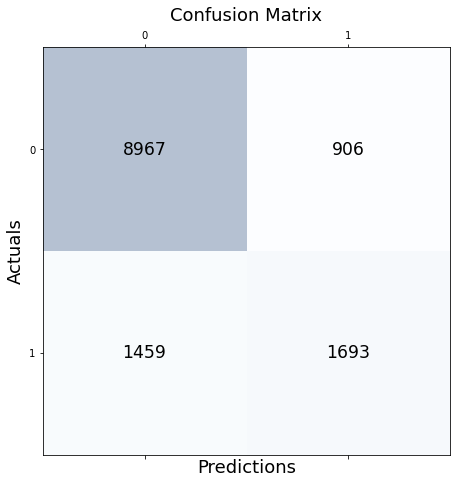

In [108]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [109]:
from sklearn.metrics import f1_score

print(f1_score(y_pred_rf, y_test_rf))

0.5887671709267954


# ----------------------

# MODEL - K NEAREST NEIGHBORS (WITH K-FOLD CROSS VALIDATION)


In [110]:
# create a deep copy of the preprocessed data
seed = 0
knn_data = raw_data.copy(deep = True)

In [113]:
# Scale the input values
scaler = StandardScaler()

target_class = knn_data['class']
input_values = knn_data.drop(['class'], axis=1)

knn_data_scaled = pd.DataFrame(scaler.fit_transform(input_values), columns = input_values.columns)

knn_data_scaled

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,0.030671,2.624298,-1.146982,0.921634,-1.545256,-0.277805,0.393668,0.703071,-0.035429,0.307208
1,0.837109,1.721100,-1.146982,-0.406212,-0.790092,-0.900181,0.393668,0.703071,-2.222153,0.307208
2,-0.042642,-0.085296,-0.320568,-1.734058,-0.286649,-0.277805,0.393668,0.703071,-0.035429,0.307208
3,1.057047,-0.085296,0.919052,-0.406212,-0.286649,-0.900181,-1.962621,0.703071,-0.035429,0.307208
4,-0.775768,-0.085296,-1.146982,-0.406212,0.720237,2.211698,-1.962621,-1.422331,-0.035429,-3.255119
...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,-0.085296,-1.973395,-0.406212,1.475401,2.211698,0.393668,-1.422331,-0.197409,0.307208
32557,0.103983,-0.085296,-0.320568,-0.406212,-0.034928,-0.900181,0.393668,0.703071,-0.035429,0.307208
32558,1.423610,-0.085296,-0.320568,2.249480,-1.545256,1.589322,0.393668,-1.422331,-0.035429,0.307208
32559,-1.215643,-0.085296,-0.320568,0.921634,-1.545256,0.966947,0.393668,0.703071,-1.655225,0.307208


In [114]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(knn_data_scaled, target_class, test_size=0.3, random_state=seed)

In [115]:
# n_neighbors -> number of neighbors to consider
# weights -> weightage given is uniform or based of proximity
# metric -> distance metric

param_grid_knn = {'n_neighbors': list(range(5, 21)), 
              'weights': ['uniform', 'distance'],
              'metric': ['l1', 'l2', 'cosine']
             }

In [116]:
# create a parameter grid to check the best model hyperparameters
knn = KNeighborsClassifier()

# using gridsearchCV to find the best combinations of hyperparameters
clf_knn = GridSearchCV(knn, param_grid_knn)

clf_knn.fit(X_train_knn, y_train_knn)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['l1', 'l2', 'cosine'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [117]:
cv_results_knn = pd.DataFrame(clf_knn.cv_results_)

cv_results_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030824,0.002677,0.661971,0.011878,l1,5,uniform,"{'metric': 'l1', 'n_neighbors': 5, 'weights': ...",0.816626,0.824742,0.806933,0.816367,0.813295,0.815593,0.005756,36
1,0.028781,0.000552,0.546966,0.002623,l1,5,distance,"{'metric': 'l1', 'n_neighbors': 5, 'weights': ...",0.806756,0.819697,0.796841,0.800351,0.797938,0.804317,0.008424,81
2,0.028580,0.000375,0.687795,0.006945,l1,6,uniform,"{'metric': 'l1', 'n_neighbors': 6, 'weights': ...",0.821671,0.817943,0.815050,0.819000,0.813295,0.817392,0.002948,19
3,0.028509,0.000410,0.575948,0.009370,l1,6,distance,"{'metric': 'l1', 'n_neighbors': 6, 'weights': ...",0.810265,0.821452,0.799035,0.803861,0.800790,0.807081,0.008141,75
4,0.032038,0.003159,0.729762,0.033941,l1,7,uniform,"{'metric': 'l1', 'n_neighbors': 7, 'weights': ...",0.826278,0.824962,0.815709,0.815928,0.817025,0.819980,0.004645,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.004425,0.000053,1.425715,0.012220,cosine,18,distance,"{'metric': 'cosine', 'n_neighbors': 18, 'weigh...",0.809607,0.819039,0.799254,0.797499,0.795963,0.804273,0.008794,82
92,0.004460,0.000036,1.555753,0.039055,cosine,19,uniform,"{'metric': 'cosine', 'n_neighbors': 19, 'weigh...",0.825620,0.817943,0.811979,0.809346,0.811979,0.815373,0.005847,38
93,0.004337,0.000087,1.430942,0.023956,cosine,19,distance,"{'metric': 'cosine', 'n_neighbors': 19, 'weigh...",0.811362,0.819039,0.799693,0.797938,0.795963,0.804799,0.008912,78
94,0.004488,0.000076,1.537286,0.028467,cosine,20,uniform,"{'metric': 'cosine', 'n_neighbors': 20, 'weigh...",0.823207,0.817723,0.810882,0.810004,0.812418,0.814847,0.004965,41


In [118]:
# attirbute that gives the parameter setting for the best results
print(clf_knn.best_params_)

{'metric': 'l1', 'n_neighbors': 19, 'weights': 'uniform'}


Therefore, the best set of hyperparameters from the grid search are:
- n_neighbors = 18
- weights = uniform
- metric = l1

We will use this to model a KNN in the k-fold cross validation step next.

In [119]:
# make k folds
k = 5

folds = np.array_split(knn_data.sample(frac=1, random_state=seed), indices_or_sections=k)

In [120]:
# check the number of samples and number of samples from each class in each fold

for i in range(len(folds)):
  fold_df = folds[i]
  print(f"fold-{i+1}: {len(fold_df)} samples")
  d = dict(fold_df.value_counts('class'))
  for k in d:
    print(f"\t Number of samples for {k} = {d[k]}")

fold-1: 6513 samples
	 Number of samples for 0 = 4918
	 Number of samples for 1 = 1595
fold-2: 6512 samples
	 Number of samples for 0 = 4955
	 Number of samples for 1 = 1557
fold-3: 6512 samples
	 Number of samples for 0 = 4909
	 Number of samples for 1 = 1603
fold-4: 6512 samples
	 Number of samples for 0 = 4947
	 Number of samples for 1 = 1565
fold-5: 6512 samples
	 Number of samples for 0 = 4991
	 Number of samples for 1 = 1521


From the above splits, can observe that there are fairy equal number of samples with target zeros and target ones across the folds, but the number of attributes with target 0 are over 3 times more than the number of attributes with target 1.

In [121]:
knn_accuracies = []
knn_precisions = []
knn_recalls = []
knn_f1s = []

for i in range(len(folds)):

  # create the val - X and y using fold-i
  val = folds[i]
  val_X = val.drop(['class'], axis=1)
  val_y = val[['class']]

  # create the train - X and y using all folds except fold-i
  a = folds[ (i+1) % 5 ]
  b = folds[ (i+2) % 5 ]
  c = folds[ (i+3) % 5 ]
  d = folds[ (i+4) % 5 ]
  partial_folds = [a,b,c,d]
  new_train = pd.concat(partial_folds, sort=False)

  train_X = new_train.drop(['class'], axis=1)
  train_y = new_train[['class']]

  # training the KNN classifier based on the hyperparameters obtained from the CV grid search
  knn = KNeighborsClassifier(n_neighbors = 19,  weights='uniform', metric='l1')
  knn.fit(train_X, train_y.values.ravel())

  # make predictions on validation set
  y_pred_knn = knn.predict(val_X)

  # compute accuracy
  fold_acc = accuracy_score(val_y, y_pred_knn)
  fold_pre = precision_score(val_y, y_pred_knn)
  fold_rec = recall_score(val_y, y_pred_knn)
  fold_f1 = f1_score(val_y, y_pred_knn)

  knn_accuracies.append(fold_acc)
  knn_precisions.append(fold_pre)
  knn_recalls.append(fold_rec)
  knn_f1s.append(fold_f1)

  print(f"Accuracy of KNN model on fold {i+1}: %.2f" % (fold_acc*100),"%")
  print(f"Precision of KNN model on fold {i+1}: %.2f" % (fold_pre*100),"%")
  print(f"Recall of KNN model on fold {i+1}: %.2f" % (fold_rec*100),"%")
  print("\n")

Accuracy of KNN model on fold 1: 80.98 %
Precision of KNN model on fold 1: 62.48 %
Recall of KNN model on fold 1: 55.86 %


Accuracy of KNN model on fold 2: 81.97 %
Precision of KNN model on fold 2: 63.79 %
Recall of KNN model on fold 2: 56.90 %


Accuracy of KNN model on fold 3: 80.77 %
Precision of KNN model on fold 3: 62.56 %
Recall of KNN model on fold 3: 54.52 %


Accuracy of KNN model on fold 4: 80.87 %
Precision of KNN model on fold 4: 61.18 %
Recall of KNN model on fold 4: 55.78 %


Accuracy of KNN model on fold 5: 81.48 %
Precision of KNN model on fold 5: 60.85 %
Recall of KNN model on fold 5: 58.05 %




In [123]:
print('Mean accuracy: {:.2f}'.format(np.mean(knn_accuracies)*100),"%")
print('Standard deviation of accuracy: {:.4f}'.format(np.std(knn_accuracies)))

Mean accuracy: 81.21 %
Standard deviation of accuracy: 0.0045


In [125]:
print('Mean precision: {:.2f}'.format(np.mean(knn_precisions)*100),"%")
print('Standard deviation of precision: {:.4f}'.format(np.std(knn_precisions)))

Mean precision: 62.17 %
Standard deviation of precision: 0.0106


In [126]:
print('Mean recall: {:.2f}'.format(np.mean(knn_recalls)*100),"%")
print('Standard deviation of recall: {:.4f}'.format(np.std(knn_recalls)))

Mean recall: 56.23 %
Standard deviation of recall: 0.0119


In [127]:
print('Mean f1 score: {:.2f}'.format(np.mean(knn_f1s)))
print('Standard deviation of f1 score: {:.4f}'.format(np.std(knn_f1s)))

Mean f1 score: 0.59
Standard deviation of f1 score: 0.0070


# ---------------------

# RESULTS

### 1. Random Forest

*   Best Hyperparameters - 
  - bootstrap: True
  - criterion: gini
  - max_features: sqrt
  - n_estimators: 100
*   Accuracy - 81.84%
*   Precision - 65.14%
*   Recall - 53.71%
*   F1-score - 0.588

---

*   Best Hyperparameters - 
  - metric: l1
  - neighbors: 19
  - weights: uniform
*   Accuracy - 81.21%
*   Precision - 61.27%
*   Recall - 56.23%
*   F1-score - 0.59



---

Based on the results, we can observe the accuracies achieved by the two models - the Random Forest and the KNN model.

A reason for the accuracy not crossing into the 90+ range could be because the number of samples of individuals earning more than 50K per years is really low in comparison to the number of individuals earning less than 50K per year.

Despite the imbalance in samples per class, the models managed to cross 80% but with a low recall as the class with lesser samples was not classified correctly 50% of the times.


---

As part of this homework I used multiple different concepts taught in CSE 572 - data mining. 
- Data cleaning
- Removing NaN Values
- Data visualization
- Feature Engineering
- Feature Selection
- Standardization
- Random Forest Model
- K-Nearest Neighbors Model
- GridSearchCV for optimal hyperparameters
- K-folds cross validations

---

END OF NOTEBOOK